## Data exploration and tidy data

### Objectives
* Tidy data, from theory to practice
* Explore raw data

### Notes
* Online course resource in R [link](https://rmagno.eu/tdvr.oct.22/). Some commands in R are shown as first line comment in the cells.



In [1]:
import os
import pandas as pd
from pandas.api.types import CategoricalDtype
import numpy as np

## 1. Raw data

In [2]:
from google.colab import drive
drive.mount('/content/drive')
gdrive_path = '/content/drive/MyDrive/Tidy_Python_2025/'
!mkdir -p $gdrive_path

%cd $gdrive_path

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/MyDrive/Tidy_Python_2025


In [7]:
# !rm -r 2025-tidy-python
!git clone https://github.com/Py-ualg/2025-tidy-python.git

Cloning into '2025-tidy-python'...
remote: Enumerating objects: 674, done.
remote: Counting objects: 100% (674/674), done.
remote: Compressing objects: 100% (650/650), done.
remote: Total 674 (delta 81), reused 586 (delta 21), pack-reused 0 (from 0)
Receiving objects: 100% (674/674), 13.59 MiB | 9.03 MiB/s, done.
Resolving deltas: 100% (81/81), done.
Updating files: 100% (102/102), done.


In [ ]:
# alternative to download single files
# !wget https://github.com/Py-ualg/2025-tidy-python/blob/main/r2py/raw-data-python/2020-01-18_area1.csv

In [8]:
data_raw_path = gdrive_path+'2025-tidy-python/r2py/raw-data-python/'

In [9]:
!find . -name \*2020-0\*.csv |sort

./2025-tidy-python/r2py/raw-data-python/2020-01-05_ra.csv
./2025-tidy-python/r2py/raw-data-python/2020-01-05_rf.csv
./2025-tidy-python/r2py/raw-data-python/2020-02-12_ra.csv
./2025-tidy-python/r2py/raw-data-python/2020-02-12_rf.csv
./2025-tidy-python/r2py/raw-data-python/2020-03-30_ra.csv
./2025-tidy-python/r2py/raw-data-python/2020-03-30_rf.csv
./2025-tidy-python/r2py/raw-data-python/2020-04-23_ra.csv
./2025-tidy-python/r2py/raw-data-python/2020-04-23_rf.csv
./2025-tidy-python/r2py/raw-data-python/2020-05-31_ra.csv
./2025-tidy-python/r2py/raw-data-python/2020-05-31_rf.csv
./2025-tidy-python/r2py/raw-data-python/2020-06-02_ra.csv
./2025-tidy-python/r2py/raw-data-python/2020-06-02_rf.csv
./2025-tidy-python/r2py/raw-data-python/2020-07-13_ra.csv
./2025-tidy-python/r2py/raw-data-python/2020-07-13_rf.csv
./2025-tidy-python/r2py/raw-data-python/2020-08-04_ra.csv
./2025-tidy-python/r2py/raw-data-python/2020-08-04_rf.csv
./2025-tidy-python/r2py/raw-data-python/2020-09-19_ra.csv
./2025-tidy-py

In [10]:
# quadrats01 <- readxl::read_excel(file.path(data_raw_path, "quadrats.xlsx"))
quadrats01  = pd.read_excel(os.path.join(data_raw_path, 'quadrats.xlsx'))
quadrats01.head()

,Unnamed: 0,Ria Formosa-rf,Ria Alvor-ra
0,Area (m2),250,360


In [12]:
# df1_q1 <- readr::read_csv(file.path(data_raw_path, "2020-01-04_q1.csv"))
df1_ra = pd.read_csv(os.path.join(data_raw_path, '2020-01-05_ra.csv')).reset_index(drop=True)
# df1_rf <- readr::read_csv(file.path(data_raw_path, "2020-01-04_rf.csv"))
df1_rf = pd.read_csv(os.path.join(data_raw_path, '2020-01-05_rf.csv')).reset_index(drop=True)
df1_ra.shape, df1_rf.shape

((239, 16), (380, 16))

In [13]:
df1_ra.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 239 entries, 0 to 238
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Unnamed: 0          239 non-null    int64  
 1   cl [mm]             239 non-null    int64  
 2   lcl [mm]            239 non-null    float64
 3   fw [mm]             239 non-null    int64  
 4   species_name        239 non-null    object 
 5   longitude           1 non-null      float64
 6   is_gravid?          239 non-null    bool   
 7   rcl [mm]            239 non-null    float64
 8   stage               239 non-null    object 
 9   sex                 231 non-null    object 
 10  id                  239 non-null    int64  
 11  cw [mm]             239 non-null    float64
 12  latitude            1 non-null      float64
 13  associated_species  239 non-null    object 
 14  depth [m]           239 non-null    int64  
 15  behavior            239 non-null    object 
dtypes: bool(

In [ ]:
df1_ra.describe()

,Unnamed: 0,cl [mm],lcl [mm],fw [mm],longitude,rcl [mm],id,cw [mm],latitude,depth [m]
count,244.000000,244.000000,244.000000,244.000000,1.00000,244.000000,244.000000,244.000000,1.00000,244.000000
mean,121.500000,262.336066,123.900276,42.540984,-7.99163,128.267084,122.500000,163.879722,37.01025,7.971311
std,70.580923,114.488816,16.086648,19.607737,NaN,227.456539,70.580923,18.337642,NaN,2.011080
min,0.000000,80.000000,74.951513,20.000000,-7.99163,0.689898,1.000000,118.113491,37.01025,3.000000
25%,60.750000,187.500000,113.821548,30.000000,-7.99163,20.580134,61.750000,151.855312,37.01025,7.000000
50%,121.500000,250.000000,124.288266,40.000000,-7.99163,49.459356,122.500000,163.902512,37.01025,8.000000
75%,182.250000,330.000000,134.098711,60.000000,-7.99163,129.351979,183.250000,176.867931,37.01025,9.000000
max,243.000000,640.000000,163.033734,110.000000,-7.99163,1500.000000,244.000000,208.258212,37.01025,14.000000


### **Exercise**: remove the "Unnamed: 0" column
- try to prompt gemini from general to specific.

In [14]:
#@title Solution

df1_ra.drop(columns=['Unnamed: 0'], inplace=True)

In [15]:
# dplyr::glimpse(df1_ra)
df1_ra.T

,0,1,2,3,4,5,6,7,8,9,...,229,230,231,232,233,234,235,236,237,238
cl [mm],280,230,260,330,190,220,110,200,100,440,...,170,330,220,110,90,460,90,110,250,120
lcl [mm],117.658024,100.162977,107.802386,87.716106,122.225485,78.332312,104.128581,81.948628,109.697326,123.368526,...,79.20116,105.678141,88.209657,94.754328,112.450772,113.742924,129.094842,81.859888,96.398981,102.488279
fw [mm],30,70,20,50,50,50,40,80,50,30,...,30,30,50,20,60,90,30,50,60,60
species_name,A. Farensis,U. olhanensis,U. olhanensis,A. Farensis,u. olhanen.,A farensis,A. Farensis,A farensis,A farensis,A. Farensis,...,A. Farensis,A farensis,u. olhanen.,A. Farensis,A farensis,A farensis,u. olhanen.,A. Farensis,A farensis,u. olhanen.
longitude,-7.99163,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
is_gravid?,False,False,False,False,False,False,False,False,False,True,...,True,False,False,False,False,False,False,False,True,False
rcl [mm],25.126955,57.257526,471.873609,9.041424,58.626041,5.062623,11.224525,42.796156,189.48778,199.941713,...,11.680992,67.561619,237.890789,2.123925,13.445956,75.232228,1236.439488,7.835068,89.711696,26.152762
stage,s,a,p,p,j,s,p,a,s,p,...,s,p,s,a,p,s,a,a,j,p
sex,,male,female,male,male,male,male,female,female,male,...,,male,male,male,male or female,,,NaN,male,female
id,1,2,3,4,5,6,7,8,9,10,...,230,231,232,233,234,235,236,237,238,239


This is typically not what you do in `pandas`, we shouw it here, because of R counterpart of `dplyr::glimpse(df1_ra)`, in python you typically do `df1_ra.head()`, however for wider tables, transposition is not a stupid idea.

In [16]:
# colnames(df1_ra)
df1_ra.columns  # index might be difficult to work with, get list by simply: list(df1_ra.columns)

Index(['cl [mm]', 'lcl [mm]', 'fw [mm]', 'species_name', 'longitude',
       'is_gravid?', 'rcl [mm]', 'stage', 'sex', 'id', 'cw [mm]', 'latitude',
       'associated_species', 'depth [m]', 'behavior'],
      dtype='object')

In [17]:
 # in R: (nrow() and ncol())
f"Table with {df1_ra.shape[0]} rows and {df1_ra.shape[1]} columns."

'Table with 239 rows and 15 columns.'

In [18]:
#@title Value counts in column
# table(df1_ra$stage)
df1_ra['stage'].value_counts()

,count
stage,
s,91
p,77
a,47
j,24


In [19]:
df1_rf['stage'].value_counts()

,count
stage,
sub_adult,126
pre_puberty,116
juvenile,71
adult,67


The "stage" column in has different labes for categories in the two data_frams. They will have to be standardized.

In [20]:
# Unique values in column
# unique(df1_ra$sex)
df1_ra['sex'].unique()

array([' ', 'male', 'female', 'male or female', '?', nan, '-', 'N/R'],
      dtype=object)

The "sex" categories will have to be cleaned.

In [21]:
df1_ra.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 239 entries, 0 to 238
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   cl [mm]             239 non-null    int64  
 1   lcl [mm]            239 non-null    float64
 2   fw [mm]             239 non-null    int64  
 3   species_name        239 non-null    object 
 4   longitude           1 non-null      float64
 5   is_gravid?          239 non-null    bool   
 6   rcl [mm]            239 non-null    float64
 7   stage               239 non-null    object 
 8   sex                 231 non-null    object 
 9   id                  239 non-null    int64  
 10  cw [mm]             239 non-null    float64
 11  latitude            1 non-null      float64
 12  associated_species  239 non-null    object 
 13  depth [m]           239 non-null    int64  
 14  behavior            239 non-null    object 
dtypes: bool(1), float64(5), int64(4), object(5)
memory usage:

In [22]:
df1_rf.drop(columns='Unnamed: 0', inplace=True)
df1_rf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 380 entries, 0 to 379
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   cl [cm]             380 non-null    int64  
 1   lcl [cm]            380 non-null    float64
 2   fw [cm]             380 non-null    int64  
 3   species             380 non-null    object 
 4   longitude           1 non-null      float64
 5   is_gravid           380 non-null    bool   
 6   rcl [cm]            380 non-null    float64
 7   stage               380 non-null    object 
 8   sex                 356 non-null    object 
 9   id                  380 non-null    int64  
 10  cw [cm]             380 non-null    float64
 11  latitude            1 non-null      float64
 12  associated_species  380 non-null    object 
 13  depth [m]           380 non-null    int64  
 14  behaviour           380 non-null    object 
dtypes: bool(1), float64(5), int64(4), object(5)
memory usage:

### Comparing the species distribution of the two places

In [23]:
df1_ra['species_name'].value_counts()

,count
species_name,
A farensis,84
A. Farensis,77
u. olhanen.,54
U. olhanensis,24


In [24]:
df1_rf['species'].value_counts()

,count
species,
A. Farensis,124
A farensis,98
u. olhanen.,88
U. olhanensis,70


In [25]:
s1 = df1_ra['species_name'].value_counts().rename('Ria do Alvor')
s2 = df1_rf['species'].value_counts().rename('Ria Formosa')
df = pd.concat([s1,s2],axis=1)
#df.columns = ['Ria do Alvor', 'Ria Formosa']
df

,Ria do Alvor,Ria Formosa
A farensis,84,98
A. Farensis,77,124
u. olhanen.,54,88
U. olhanensis,24,70


<Axes: >

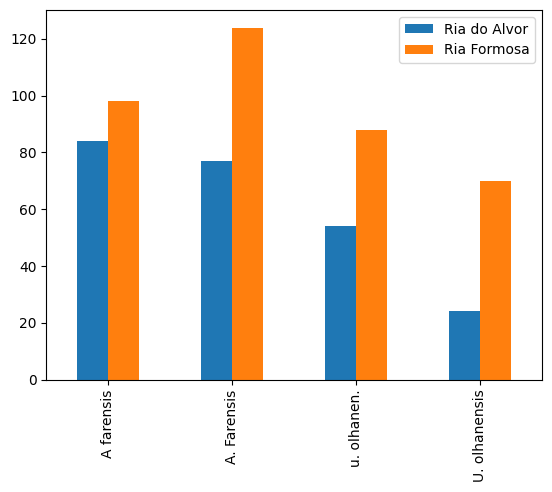

In [26]:
df.plot(kind='bar')

1. Another problem, we have inconsistent species names.
2. Since the the total counts are different, we need to normalize the data (conert to relative percentages) before comparing: